c:\Users\Sean\miniconda3\envs\py38\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


[<td>110</td>, <td>1</td>, <td>679.00</td>, <td>528.00</td>, <td>609.49</td>, <td>1,855,197</td>, <td>936,557,410,400</td>, <td>1,536,622,546</td>, <td>5.92</td>, <td>110</td>, <td>2</td>, <td>668.00</td>, <td>587.00</td>, <td>634.25</td>, <td>1,039,029</td>, <td>566,327,873,555</td>, <td>892,901,846</td>, <td>3.44</td>, <td>110</td>, <td>3</td>, <td>622.00</td>, <td>570.00</td>, <td>596.75</td>, <td>1,675,880</td>, <td>695,226,033,098</td>, <td>1,165,012,086</td>, <td>4.49</td>, <td>110</td>, <td>4</td>, <td>619.00</td>, <td>590.00</td>, <td>604.58</td>, <td>800,909</td>, <td>380,084,594,112</td>, <td>628,665,570</td>, <td>2.42</td>, <td>110</td>, <td>5</td>, <td>600.00</td>, <td>518.00</td>, <td>571.07</td>, <td>1,337,366</td>, <td>526,777,464,725</td>, <td>922,432,701</td>, <td>3.55</td>, <td>110</td>, <td>6</td>, <td>609.00</td>, <td>578.00</td>, <td>595.19</td>, <td>614,277</td>, <td>331,568,615,495</td>, <td>557,079,870</td>, <td>2.14</td>, <td>110</td>, <td>7</td>, <td>615.00</t

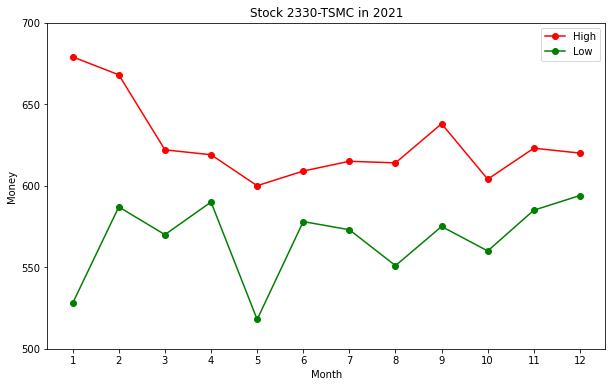

In [1]:
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests


month,high,low = [],[],[]
url = 'https://www.twse.com.tw/exchangeReport/FMSRFK?response=html&date=20210101&stockNo=2330'
html = requests.get(url)




sp = BeautifulSoup(html.text, 'html.parser')

###take out all the object tage
data = sp.select('table tbody tr td') 
print(data)



###read out data
list=[]
for inf in data:
    list.append(inf.text)


for i in range(12):
    month.append(int(list[9*i+1]))
    high.append(float(list[9*i+2]))
    low.append(float(list[9*i+3]))




#################################plot################################################
plt.figure(figsize=(10, 6))
# 可藉由label= 與 legand來加上標籤
plt.plot(month, high, label='High',marker='o', color='r')
plt.plot(month, low, label='Low',marker='o', color='g')
plt.legend()

plt.xticks(range(min(month), max(month)+1, 1))
plt.yticks(range(500, 750, 50))
plt.xlabel('Month')
plt.ylabel('Money')
plt.title("Stock 2330-TSMC in 2021")

plt.show()
